In [ ]:
# Here is the notebook where we developed intuition about the problem
# This is, we believe, a good example of visualization driven developement for deep learning

%pylab inline
import numpy as np

In [32]:
def pony(I, r):
    assert len(I.shape) == 3
    assert r>0
    r = int(r)
    O = np.zeros((I.shape[0]*r, I.shape[1]*r, I.shape[2]/(r*2)))
    for x in range(O.shape[0]):
        for y in range(O.shape[1]):
            for c in range(O.shape[2]):
                c += 1
                a = np.floor(x/r).astype("int")
                b = np.floor(y/r).astype("int")
                d = c*r*(y%r) + c*(x%r)
                print a, b, d
                O[x, y, c-1] = I[a, b, d]
    return O

In [33]:
I = np.concatenate([np.ones((8, 8, 1))*0, 20*np.ones((8, 8, 1)), 30*np.ones((8, 8, 1)), 40*np.ones((8, 8, 1))], axis=-1)

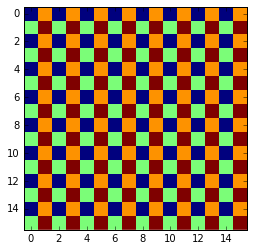

In [38]:
imshow(O[:, :, 0], interpolation="none")

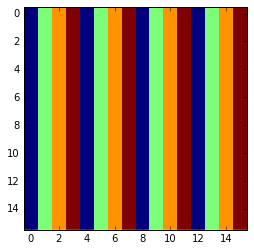

In [49]:
imshow(I.reshape(16, 16), interpolation="none")

(128, 2)


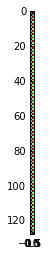

In [52]:
A = I.reshape(-1, 2, 2)
A = np.concatenate([i for i in A], axis=0)
print A.shape
imshow(A, interpolation="none")

In [67]:
B = I.reshape(8, 8, 2, 2)

In [68]:
B = np.concatenate([B[i] for i in range(8)], axis=1)
print B.shape

(8, 16, 2)


In [69]:
B = B.transpose(1, 2, 0)
print B.shape

(16, 2, 8)


In [70]:
B = np.concatenate([B[:, :, i] for i in range(8)], axis=1)
print B.shape

(16, 16)


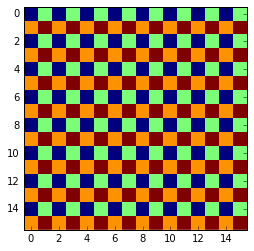

In [71]:
imshow(B, interpolation="none")

In [72]:
def pony2(I, r):
    B = I.reshape(8, 8, 2, 2).transpose(0, 1, 3, 2)
    B = np.concatenate([B[i] for i in range(8)], axis=1)
    B = B.transpose(1, 2, 0)
    B = np.concatenate([B[:, :, i] for i in range(8)], axis=1)
    return B

In [73]:
B = pony2(I)
imshow(B, interpolation="none")

In [75]:
I = np.arange(16*16).reshape(8, 8, 4)
A = pony(I, 2)
B = pony2(I)

In [79]:
imshow(A[:, :, 0], interpolation="none")

In [80]:
imshow(B, interpolation="none")

In [81]:
A

In [83]:
B == A[:, :, 0]

In [ ]:
def pony2(I, r):
    a, b, c = I.shape
    B = I.reshape(a/r, b/r, r, r).transpose(0, 1, 3, 2)
    B = np.concatenate([B[i] for i in range(8)], axis=1)
    B = B.transpose(1, 2, 0)
    B = np.concatenate([B[:, :, i] for i in range(8)], axis=1)
    return B